In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading the Data
train = pd.read_csv("/content/drive/MyDrive/emnist-letters-train.csv")
test = pd.read_csv("/content/drive/MyDrive/emnist-letters-test.csv")

In [3]:
x_train = train[train.columns[1:]]

In [4]:
x_train = x_train/256.0
x_train = x_train.values
x_train = x_train.T

In [5]:
class LogReg:
  def sigmoid(z):
    return (1/(1+np.exp(-z)))

  def model(x, y, learning_rate, iterations ):
    m = x_train.shape[1]
    n = x_train.shape[0]
    w= np.zeros((n, 1))
    b = 0
    cost_list = []
    for i in range(iterations):
        z = np.dot(w.T , x) + b
        A = LogReg.sigmoid(z)
        
        cost = -(1/m)*np.sum(y*np.log(A+(1e-7)) + (1- y)*np.log(1-A+ (1e-7)))
        dw = (1/m)*np.dot((A-y) , x.T)
        db = (1/m)*np.sum(A-y)
        w = w- learning_rate*dw.T
        b = b- learning_rate*db
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("cost after ", i , "iterations is :", cost)
    return w, b , cost_list
  
  def train_and_plot(x_train,iterations,learning_rate,train,k):   # k is no.of alphabets we want to train for
    h = []
    b = []
    cost= []
    cost_all = []
    alphabets = ["A", "B", "C", "D", "E", "F", 'G', 'H', 'I', 'J', 'K', "L", "M", "N", "O", "P", "Q", "R",
                 "S", "T", "U", "V", "W", "X", "Y", "Z"] 
    for j in range(1, k):
        x = train["23"].copy()
        for i in range(0, x.shape[0]):
          if x.iloc[i] == j:
            x.iloc[i] = 1
          else:
            x.iloc[i] = 0
        y_train = x.values.reshape(1, x_train.shape[1]) 
        print("Cost update for "+ str(alphabets[j-1]))
        w, t , cost = LogReg.model(x_train, y_train, learning_rate = learning_rate, iterations = iterations)
        h.append(w)
        b.append(t)
        cost_all.append(cost)
        plt.plot(cost)
      
      
        plt.xlabel("Iterations") 
        plt.ylabel("Cost")
        plt.title("Cost function for "+ str(alphabets[j-1]))
        plt.show()
        return h,b

  def accuracy(X, Y, W, B):
    alphabets = ["A", "B", "C", "D", "E", "F", 'G', 'H', 'I', 'J', 'K', "L", "M", "N", "O", "P", "Q", "R",
                 "S", "T", "U", "V", "W", "X", "Y", "Z"]   
    Z = np.dot(W.T, X) + B
    A = LogReg.sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100  
    print("Accuracy of the model  is : ", round(acc, 2), "%")  
  
  def test(x_test,h,b,test,k):
    for j in range(1, k):
      x = test["1"].copy()
      for i in range(0, x.shape[0]):
          if x.iloc[i] == j:
            x.iloc[i] = 1
          else:
            x.iloc[i] = 0
      y_test = x.values.reshape(1, x_test.shape[1])
      LogReg.accuracy(x_test, y_test, h[j-1], b[j-1])

Cost update for A
cost after  0 iterations is : 0.6931469805599655


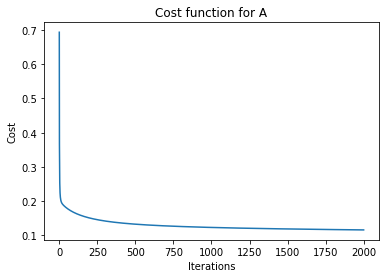

In [6]:
h,b = LogReg.train_and_plot(x_train,2001,0.05,train,2)   # i hv set k = 2 to train only for A. we can set k to how many ever alphabets we want to train

In [7]:
x_test = test[test.columns[1:]]
x_test = x_test/256.0
x_test = x_test.values
x_test = x_test.T

In [9]:
LogReg.test(x_test,h,b,test,2)

Accuracy of the model for A is :  94.96 %
